In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
data =pd.read_csv("CC GENERAL.csv")
missing = data.isna().sum()
print(missing)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


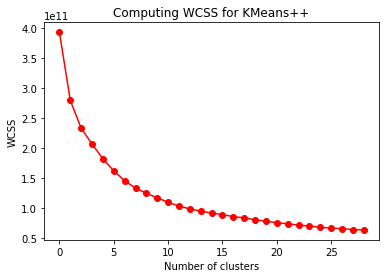

In [20]:
data = data.fillna( data.median() )

vals = data.iloc[ :, 1:].values

from sklearn.cluster import KMeans

wcss = []
for ii in range( 1, 30 ):
    kmeans = KMeans(n_clusters=ii, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( vals )
    wcss.append( kmeans.inertia_ )
    
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [21]:
kmeans = KMeans(n_clusters=8, init="k-means++", n_init=10, max_iter=300) 
y_pred = kmeans.fit_predict( vals )

C:\Users\Maram\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


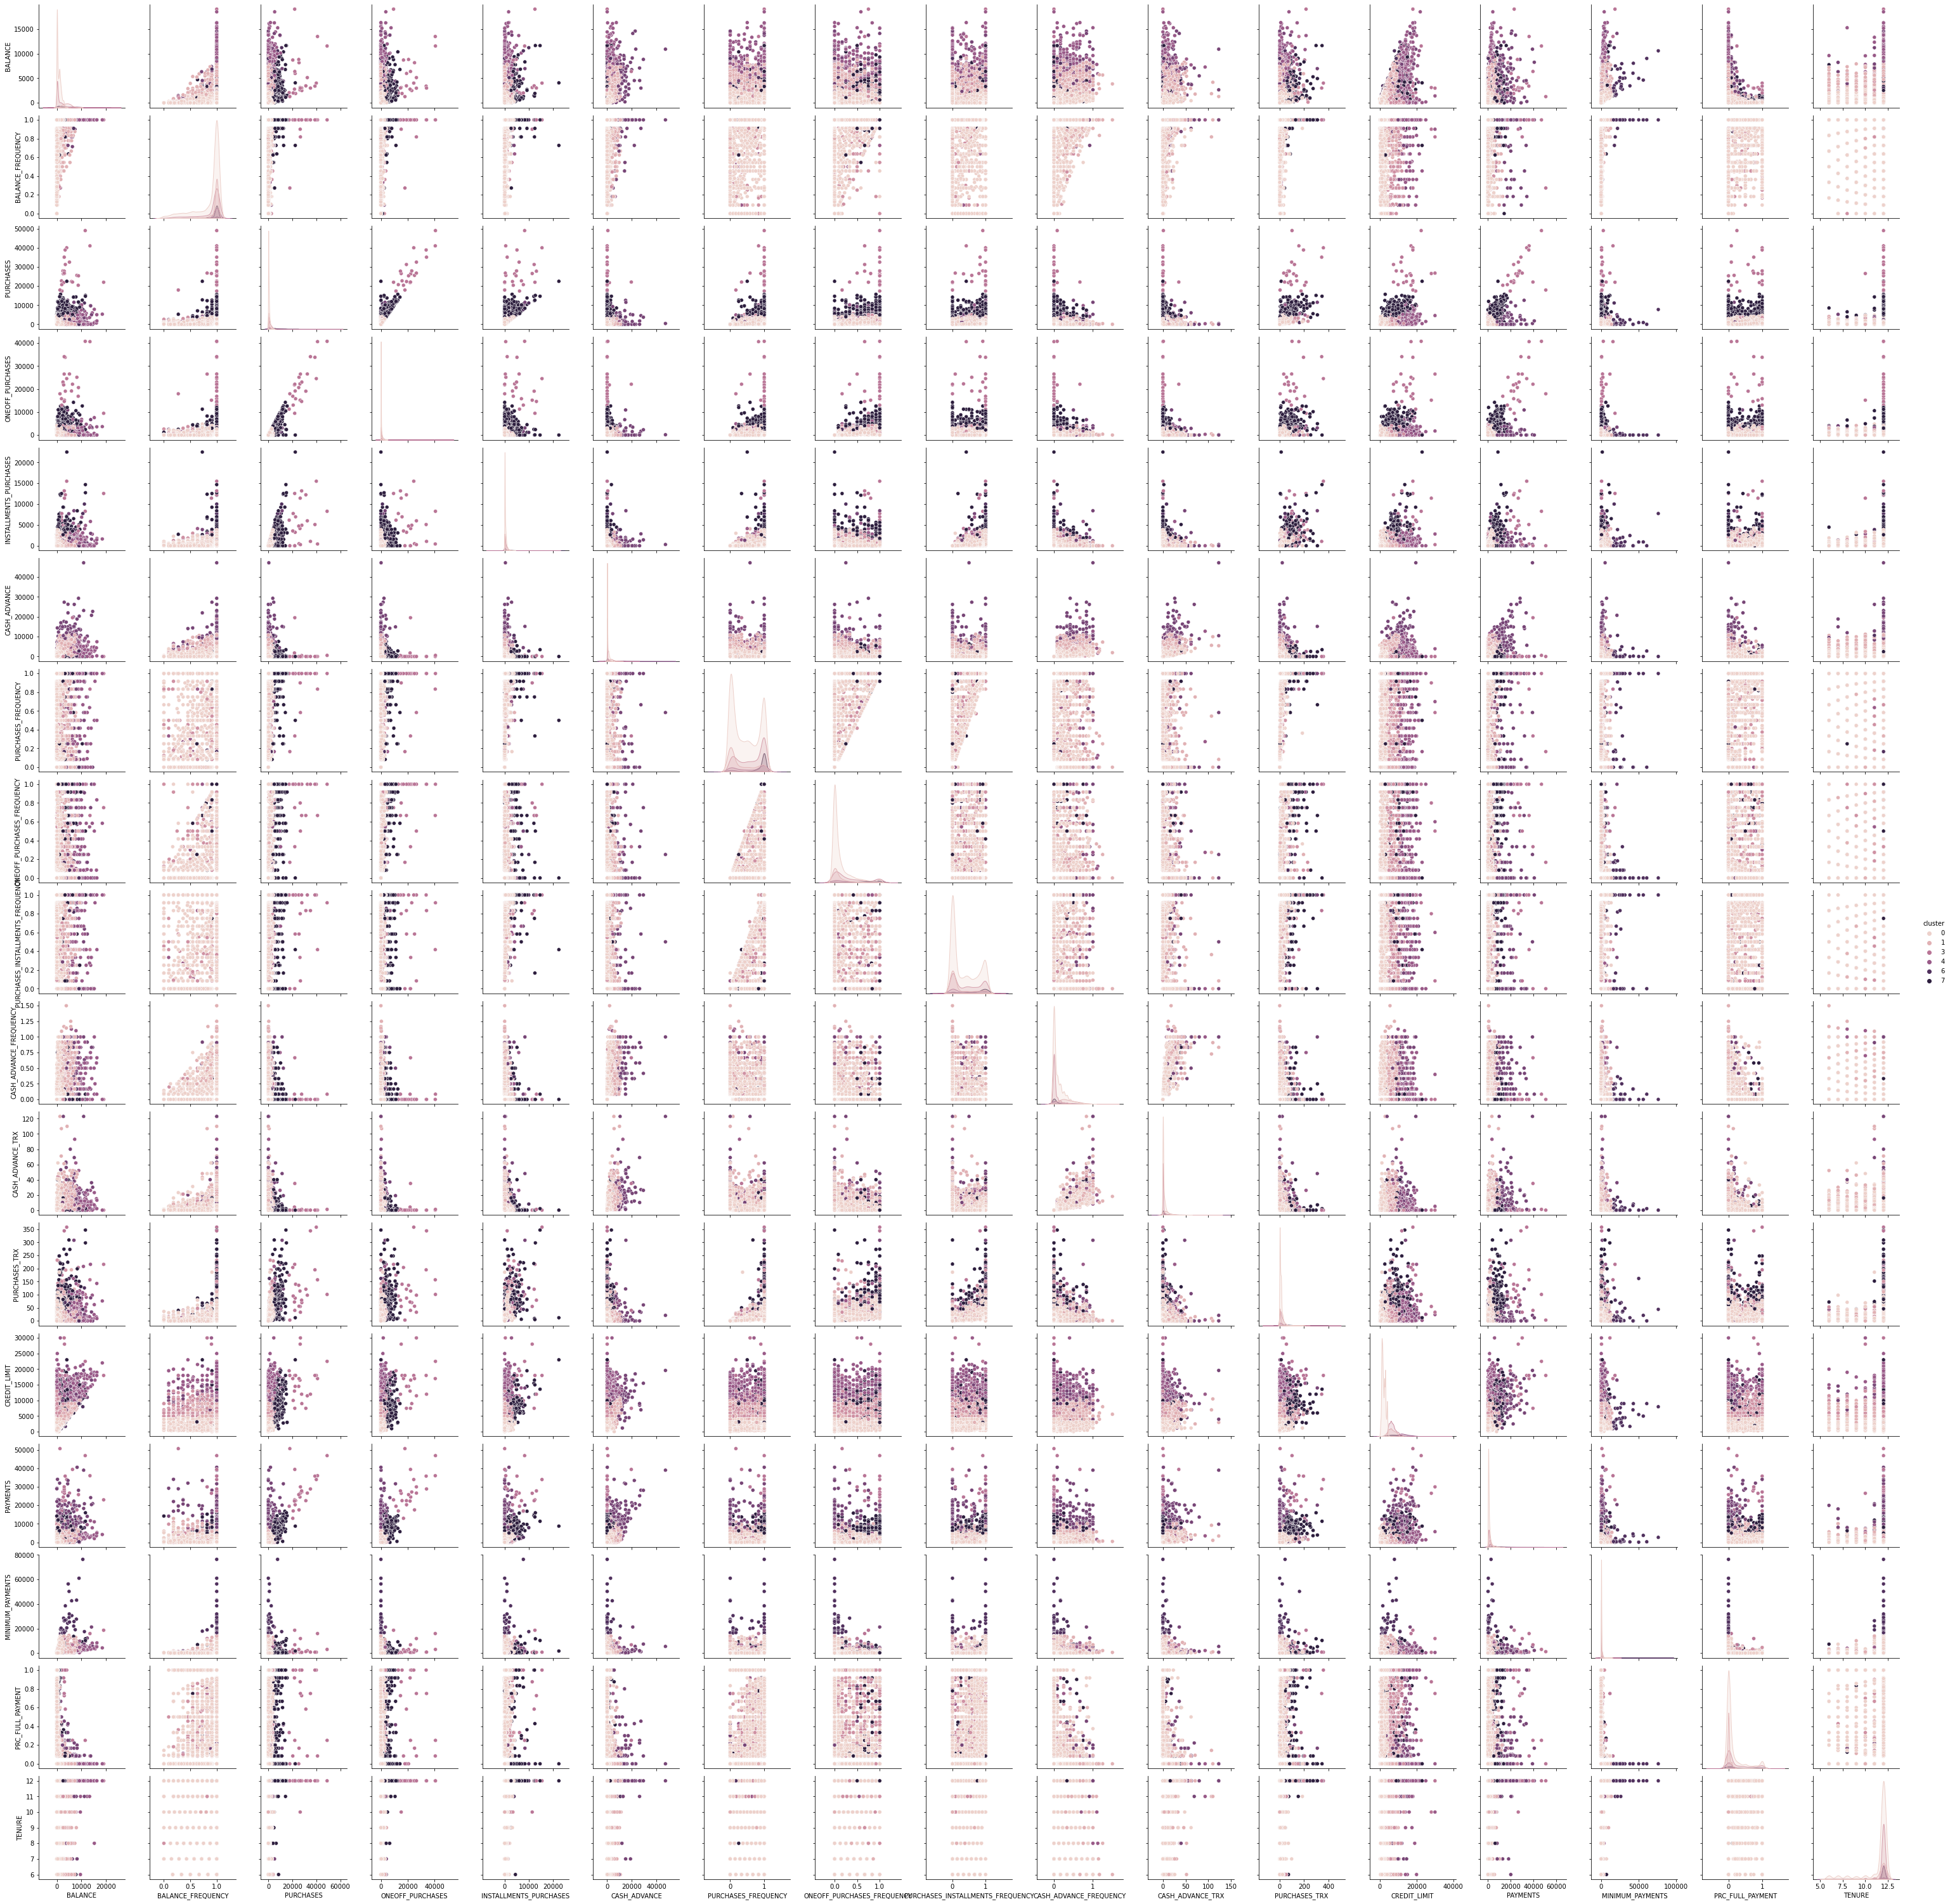

In [5]:
import seaborn as sns
data["cluster"] = y_pred
cols = list(data.columns)
cols.remove("CUST_ID")

sns.pairplot( data[ cols ], hue="cluster")

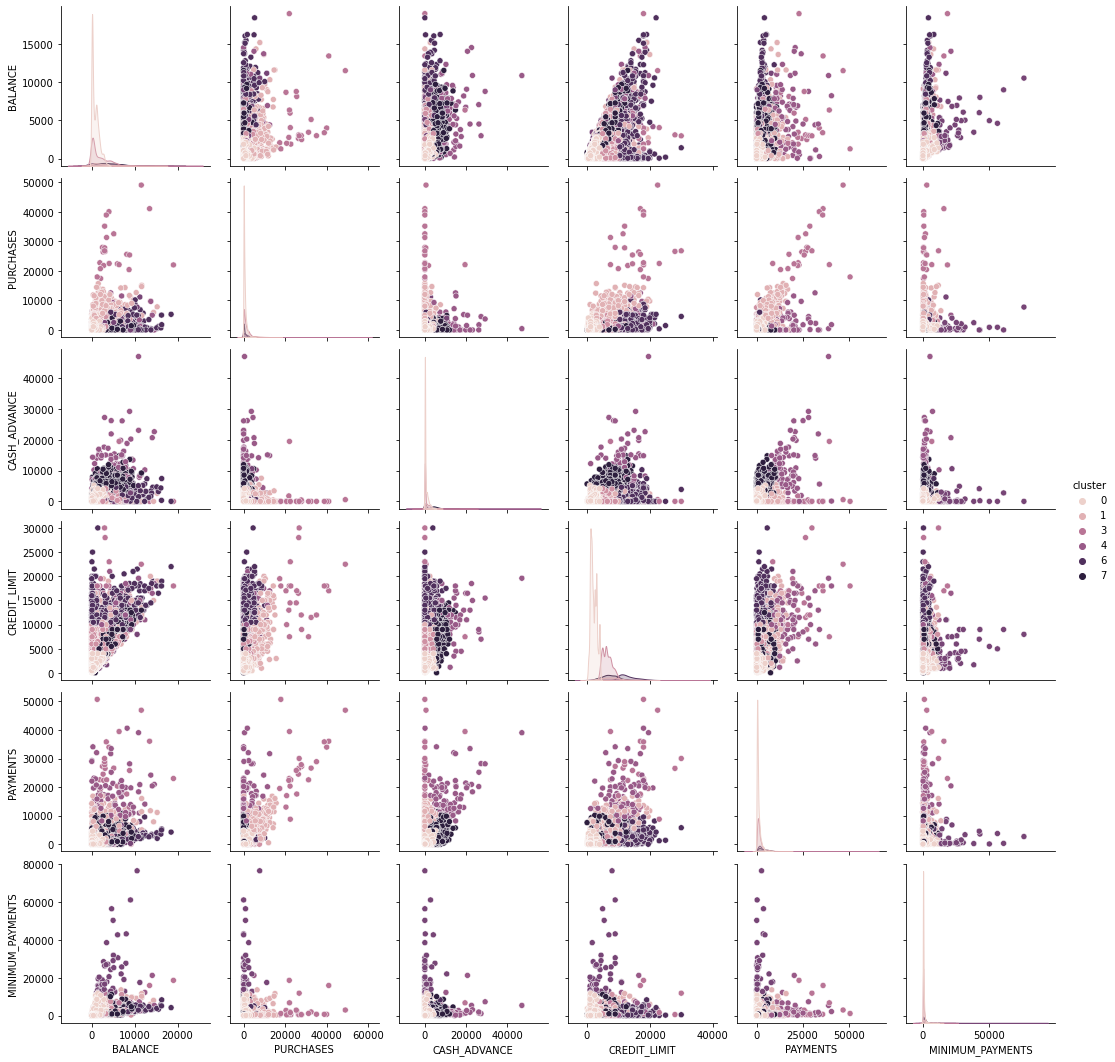

In [6]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]
kmeans = KMeans(n_clusters=8, init="k-means++", n_init=10, max_iter=300) 
best_vals = data[best_cols].iloc[ :, 1:].values
y_pred = kmeans.fit_predict( best_vals )

data["cluster"] = y_pred
best_cols.append("cluster")
sns.pairplot( data[ best_cols ], hue="cluster")

### Big Spenders with large Payments:they make costly buys and have a credit limit that is among normal and high. This is just a little gathering of clients.
### Cash Advances with large Payments:this gathering takes the most loans. They make huge installments, however this seems, by all accounts, to be a little gathering of clients.
### Medium Spenders with third highest Payments:the second highest Purchases group
### Highest Credit Limit but Frugal;this group doesn't make a lot of purchases
### Cash Advances with Small Payments:this group likes taking cash advances, but make only small payments.
### Small Spenders and Low Credit Limit:they have the littlest Balances after the Smallest Spenders, their Credit Limit is in the last 3 gatherings, the second biggest gathering of clients.
### Smallest Spenders and Lowest Credit Limit:this is the gathering with the least credit limit yet they don't seem to purchase a lot. Shockingly this gives off an impression of being the biggest gathering of clients.
### Highest Min Payments:this gathering has the most elevated least installments (which probably alludes to "Min Payment Due" on the month to month proclamation. This may be an impression of the way that they have the second least Credit Limit of the gatherings, so it appears as though the bank has recognized them as higher danger.)
## So an advertising methodology that designated the initial five gatherings may be viable.

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['CUST_ID']=encoder.fit_transform(data['CUST_ID'])

In [23]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  

In [24]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

0
0     0
1     0
2     0
3     0
4     0
...  ..
8945  0
8946  0
8947  0
8948  0
8949  0

[8950 rows x 1 columns]

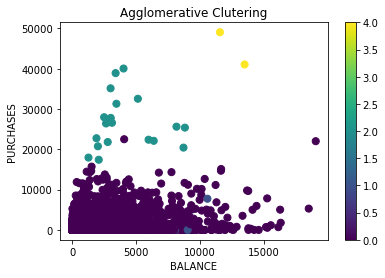

In [11]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['BALANCE'] , data ["PURCHASES"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)

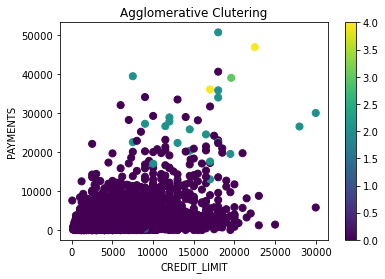

In [12]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['CREDIT_LIMIT'] , data ["PAYMENTS"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("CREDIT_LIMIT")
ax.set_ylabel("PAYMENTS")
plt.colorbar(scatter)

In [25]:
from sklearn.cluster import KMeans 

sum_of_squared_distances=[]

for k in range(1,15):
    km=KMeans (n_clusters=k)
    km=km.fit(data)
    sum_of_squared_distances.append(km.inertia_)
print(sum_of_squared_distances)    

[452898328611.9085, 333427824836.01135, 285580204146.822, 251858473428.08868, 225943415172.19025, 203467923238.69254, 184872965823.82144, 168519378215.19394, 157133192584.96854, 149228023807.8837, 142298475114.15253, 134530757264.0529, 129027991903.98013, 124284866620.19522]


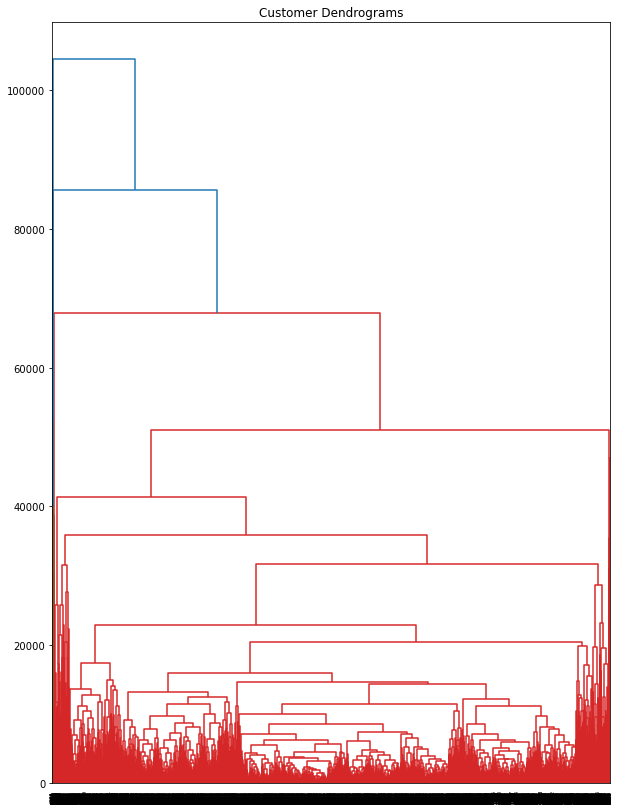

In [26]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,14))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))